Objective:
- learn how to plot feature importances

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# read in data
col_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df = pd.read_csv("../../data/iris.data", header=None, names=col_names)

In [3]:
# split into features and label
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [4]:
# label encode string class values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
# split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, shuffle=True, random_state=89
)

In [6]:
# train the model
clf = XGBClassifier()
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

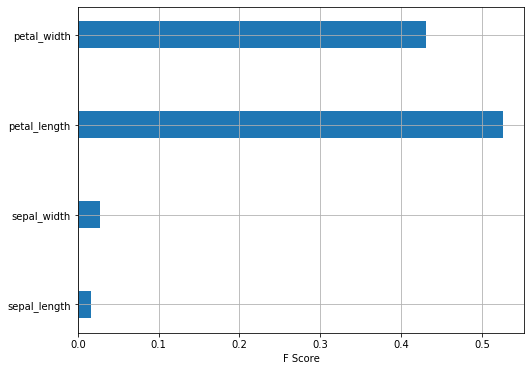

In [7]:
# manually plot feature importances
y_pos = np.arange(X.shape[1])
feat_names = col_names[:-1]
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(y_pos, clf.feature_importances_, height=0.3)
ax.set_yticks(y_pos)
ax.set_yticklabels(col_names)
ax.set_xlabel("F Score")
plt.grid()
plt.show()

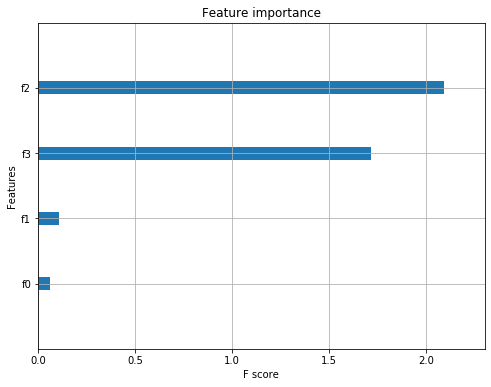

In [8]:
# use built-in api to plot feature importances
fig, ax = plt.subplots(figsize=(8, 6))
plot_importance(clf, ax=ax, importance_type="gain", show_values=False)
plt.show()